In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
file_path = "kmeans - kmeans_blobs.csv"
df = pd.read_csv(file_path)

In [12]:
X = df.values

In [13]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [14]:
def k_means(X, k, max_iters=100, tol=1e-4):
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return labels, centroids

In [15]:
labels_2, centroids_2 = k_means(X, 2)

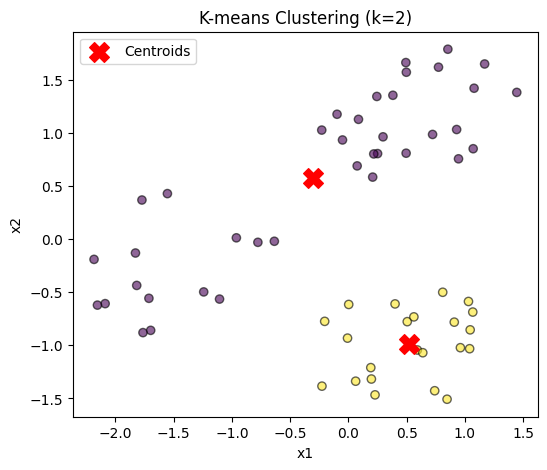

In [16]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels_2, cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(centroids_2[:, 0], centroids_2[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title('K-means Clustering (k=2)')
plt.legend()
plt.show()

In [17]:
labels_3, centroids_3 = k_means(X, 3)

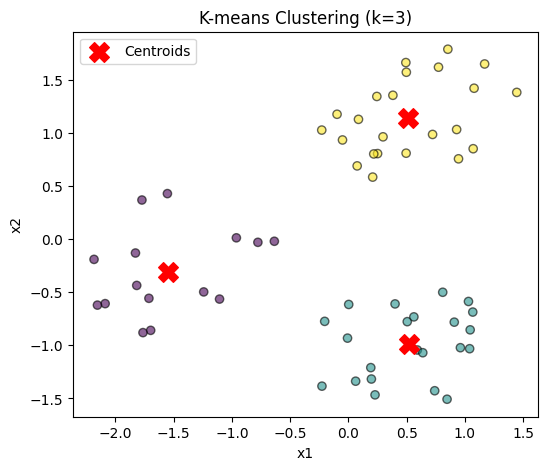

In [18]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels_3, cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(centroids_3[:, 0], centroids_3[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title('K-means Clustering (k=3)')
plt.legend()
plt.show()